<a href="https://colab.research.google.com/github/bd1ng/localx/blob/main/local_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #02
### Description
### Bochu Ding

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bd1ng/localx/blob/main/local_x.ipynb)

# 0. Set-up

In [3]:
# Install Packages
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 scikit-learn==1.2.2 shap==0.45.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
    

In [1]:
# Import Libraries

# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from sklearn.inspection import PartialDependenceDisplay

np.random.seed(1)

# 1. SHAP

In [2]:
# Load Data from shap library
X,y = shap.datasets.adult()

# Train XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = xgboost.XGBClassifier().fit(X_train, y_train)

In [3]:
#Compute SHAP values

#Define background distribution
X100 = shap.utils.sample(X, 100)

explainer = shap.TreeExplainer(model, X100) # Use the TreeExplainer algorithm with background distribution
shap_values = explainer.shap_values(X_test) # Get shap values
shap_values_exp = explainer(X_test) # Get explainer for X_test

 99%|===================| 16108/16281 [01:03<00:00]       

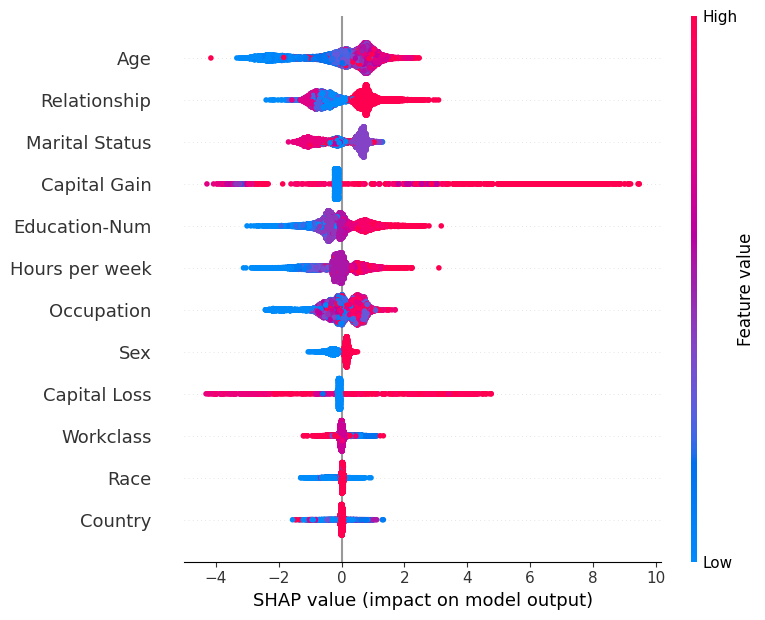

In [4]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

Interpretation: Shows how the magnitude of a feature's value impacts the feature's SHAP value. For example, both high and low ages impact the SHAP value; whereas only high values for Capital Gains impact the feature's SHAP value.

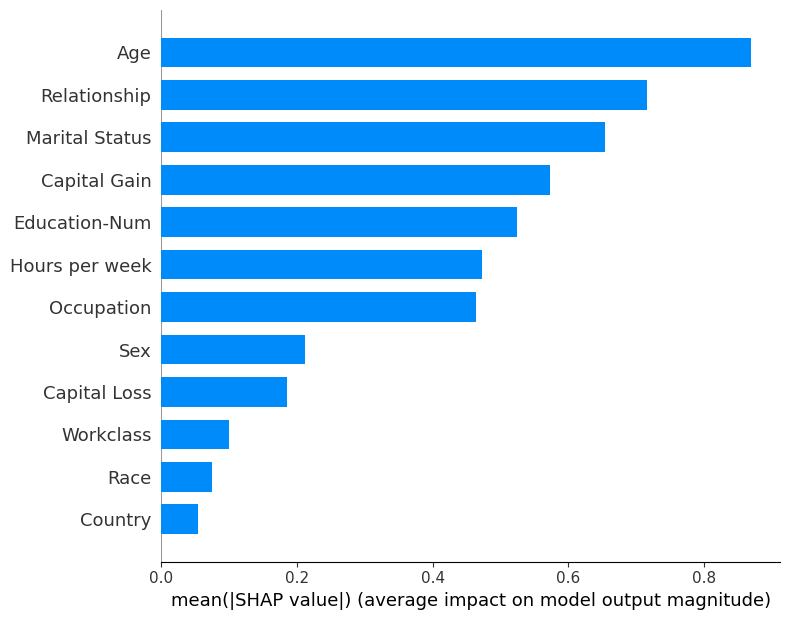

In [5]:
# SHAP Bar Chart
shap.summary_plot(shap_values, X_test, plot_type="bar")

Interpretation: A representation of the average absolute SHAP values across the dataset for a general picture of the contribution of unique features to the prediction.

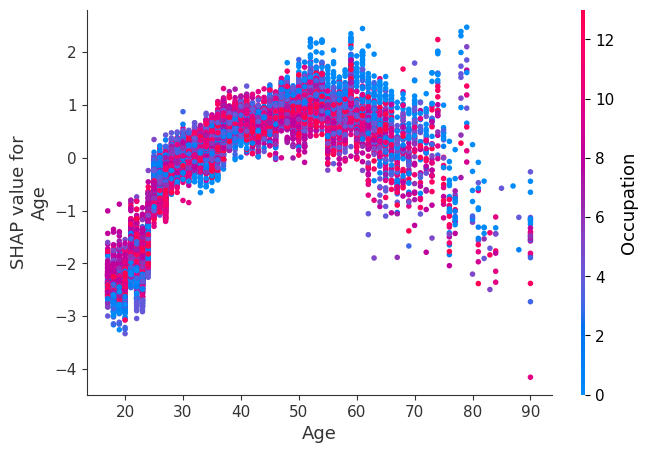

In [6]:
# SHAP with Dependence Plot (with Occuption interaction)
shap.dependence_plot('Age', shap_values, X_test, interaction_index='Occupation')

Interpretation: Plots the SHAP value relative to feature values. Here, it shows that there is a non-linear relationship between age and the SHAP values. Also shows the interaction effects (or lackthereof, in this case) between features. If there were an interaction, we would expect a gradient.

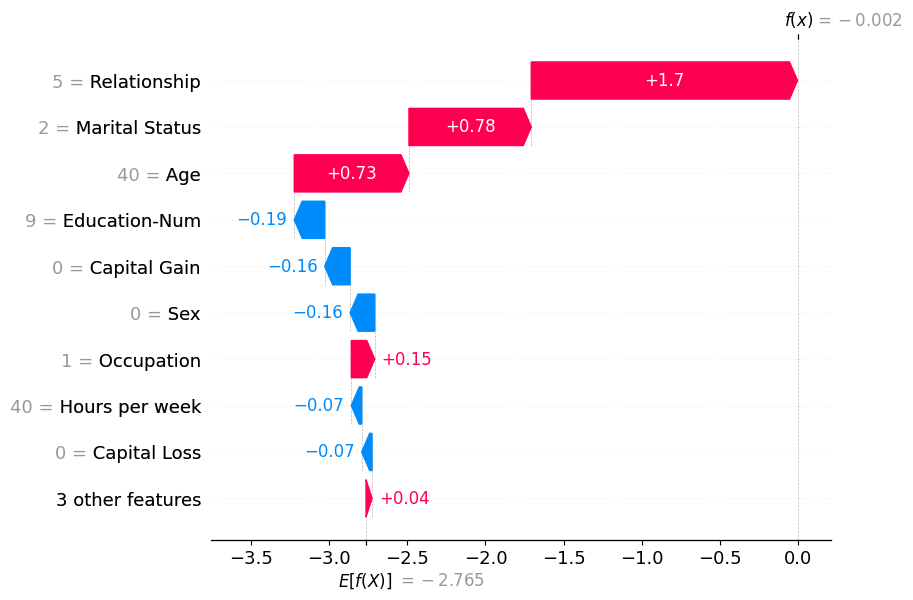

In [8]:
# SHAP Waterfall Plot

idx = 163
shap.plots.waterfall(shap_values_exp[idx])

Interpretation: For a given instance, demonstrate the features that contributed to the prediction by visualizing the SHAP values.

# 2. Discussion

I was drawn to SHAP for three main reasons. The first is that it is underpinned by theoretical rigor (i.e. game-theory-derived Shapley values) instead of assumptions — in contrast to LIME and Anchors. The second is that it offers explainability at a local and global level. And finally, I think that its additive nature is more understandable. Of course, this "understandability" is a double-edged sword, and can be used to mislead or hide biases. Furthermore calculating Shapley values can be extremely time- and resource-intensive for large datasets (features or instances). This can be remediated through SHAP, but one flaw is that kernel SHAP ignores feature dependence. One way to improve this method is to assess feature dependence via feature dependence plots (like above) and examine if there are any linear relationships. Researchers can then implement conditional SHAP or causal inference-based SHAP to circumvent this flaw.